In [ ]:
import pandas as pd                         # data manipulation
import numpy as np                          # numerical operations
import matplotlib.pyplot as plt             # basic plotting
import seaborn as sns                       # statistical vizualisation
import sklearn
from sklearn.pipeline import Pipeline       # import Pipeline class
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# mount Google Drive
from google.colab import drive
import os

# mount Google Drive
drive.mount('/content/drive', force_remount=True)

# specify the folder you want to access
project_folder = "/content/drive/My Drive/CS463"

Mounted at /content/drive


In [ ]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the datasets
train_data = pd.read_csv(project_folder + '/train_data.csv')
train_labels = pd.read_csv(project_folder + '/train_labels.csv')
test_data = pd.read_csv(project_folder + '/test_data.csv')

# Join the training data with labels
train_full = pd.concat([train_data, train_labels], axis=1)

# Display first few rows of the combined training data
print("First 5 rows of the training data:")
print(train_full.head())

# Display first few rows of the test data
print("\nFirst 5 rows of the test data:")
print(test_data.head())

First 5 rows of the training data:
   age     sex    bmi  children smoker     region      charges
0   46  female  19.95         2     no  northwest   9193.83850
1   47  female  24.32         0     no  northeast   8534.67180
2   52  female  24.86         0     no  southeast  27117.99378
3   39  female  34.32         5     no  southeast   8596.82780
4   54  female  21.47         3     no  northwest  12475.35130

First 5 rows of the test data:
   age     sex     bmi  children smoker     region
0   45  female  25.175         2     no  northeast
1   36  female  30.020         0     no  northwest
2   64  female  26.885         0    yes  northwest
3   46    male  25.745         3     no  northwest
4   19    male  31.920         0    yes  northwest


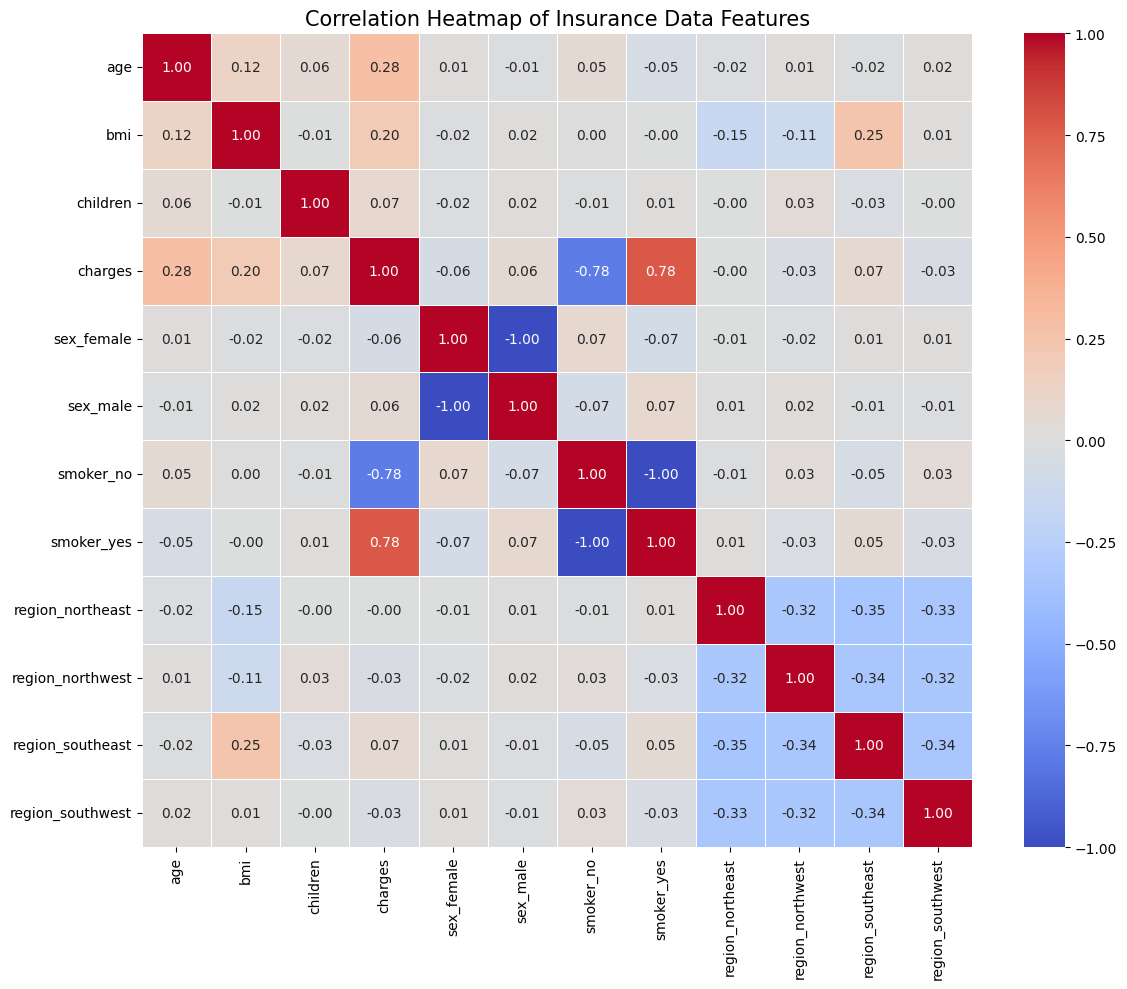

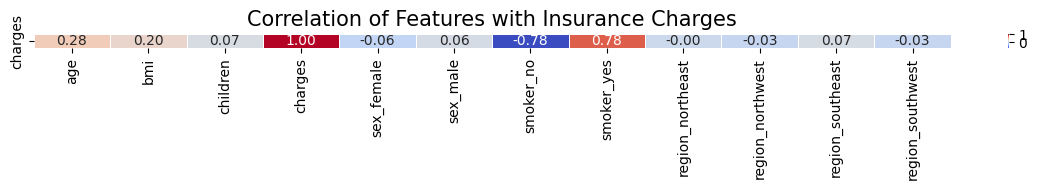

In [ ]:
# Convert categorical variables to numeric for correlation
train_numeric = train_full.copy()
# One-hot encode categorical variables
train_numeric = pd.get_dummies(train_numeric, columns=['sex', 'smoker', 'region'], drop_first=False)

# Calculate the correlation matrix
correlation_matrix = train_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Insurance Data Features', fontsize=15)
plt.tight_layout()
plt.show()

# CITE: StackOverflow
# Display a focused heatmap with just the most relevant features (easier to look at lol)
# This will show correlations with the target variable 'charges'
plt.figure(figsize=(12, 2))
sns.heatmap(correlation_matrix['charges'].to_frame().transpose(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Insurance Charges', fontsize=15)
plt.tight_layout()
plt.show()

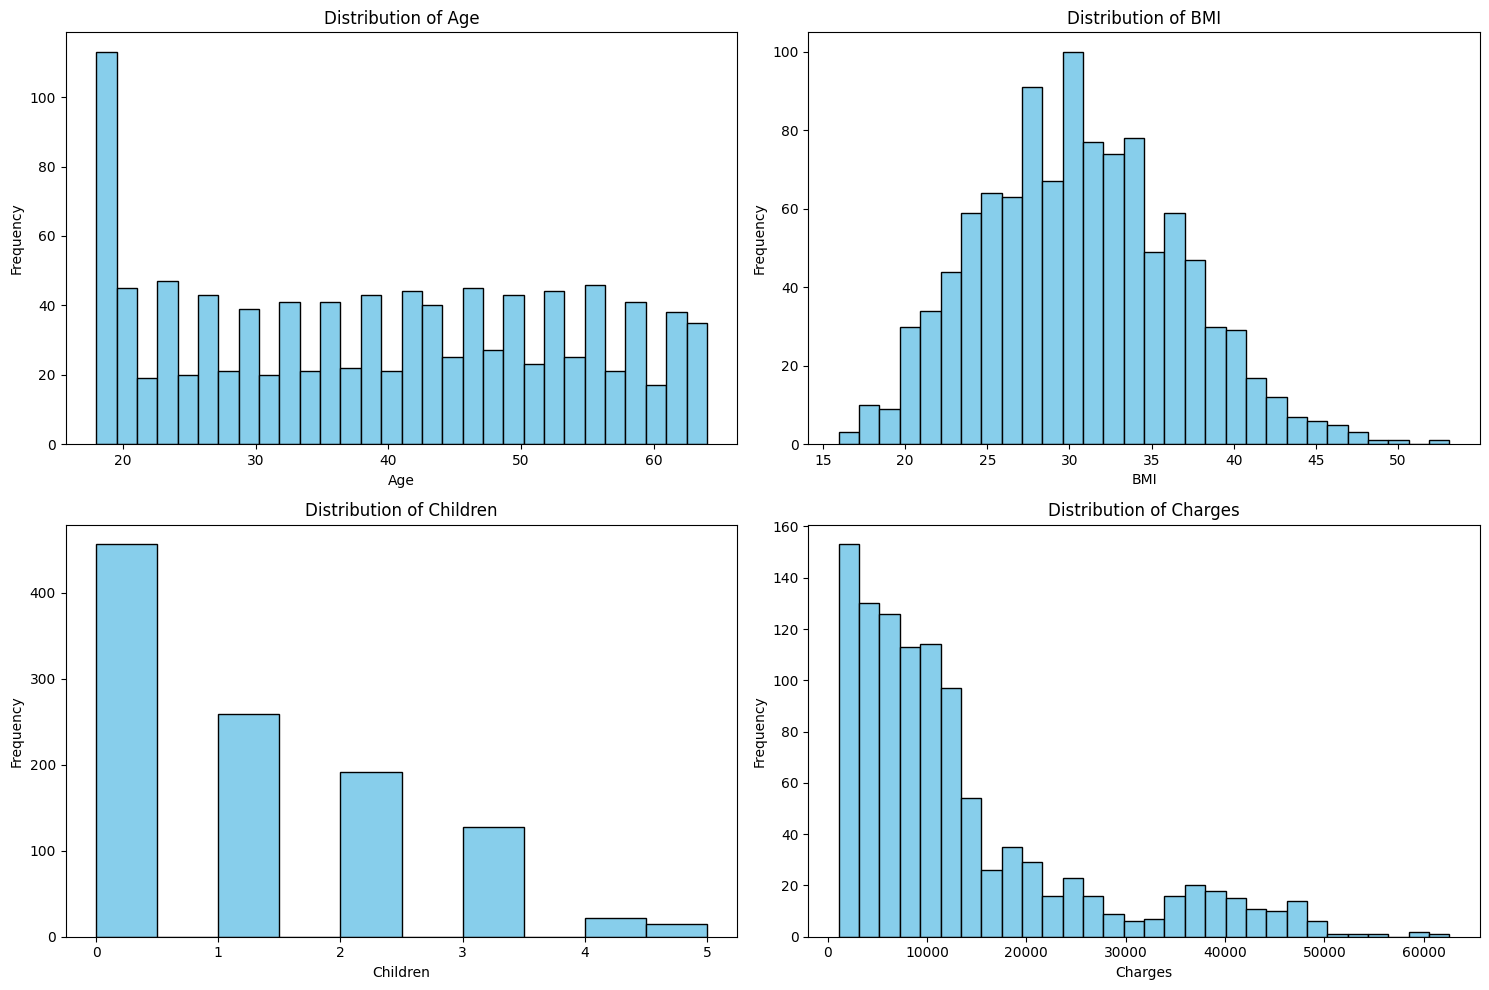

In [ ]:
# Exploratory Data Analysis

# Histograms for numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(train_full['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(train_full['bmi'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(train_full['children'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(train_full['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()
plt.close()

##Summary statistic for numerical features

In [ ]:
# Summary statistics for numerical features in training data
print("\nSummary statistics for numerical features in training data:")
print(train_full.describe())

# Distribution of categorical variables
print("\nDistribution of categorical variables:")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col}:")
    print(train_full[col].value_counts())
    print(f"{col} (proportion):")
    print(train_full[col].value_counts(normalize=True))


Summary statistics for numerical features in training data:
               age          bmi     children       charges
count  1070.000000  1070.000000  1070.000000   1070.000000
mean     39.357009    30.560397     1.107477  13346.089736
std      14.073960     6.043386     1.215983  12019.510778
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.205000     0.000000   4897.667387
50%      39.500000    30.210000     1.000000   9575.442100
75%      51.000000    34.496250     2.000000  16746.657400
max      64.000000    53.130000     5.000000  62592.873090

Distribution of categorical variables:

sex:
sex
male      548
female    522
Name: count, dtype: int64
sex (proportion):
sex
male      0.51215
female    0.48785
Name: proportion, dtype: float64

smoker:
smoker
no     850
yes    220
Name: count, dtype: int64
smoker (proportion):
smoker
no     0.794393
yes    0.205607
Name: proportion, dtype: float64

region:
region
southeast    283
northeast    267
southw

## Examining relationships with the target variable (charges)

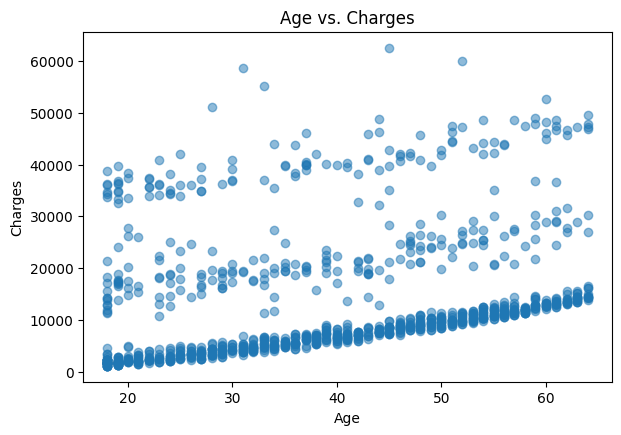

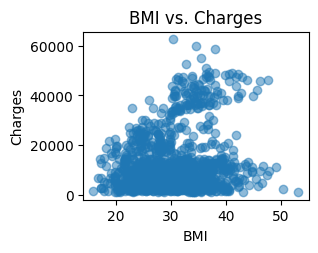

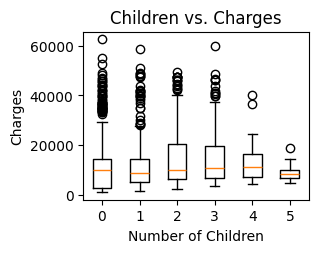

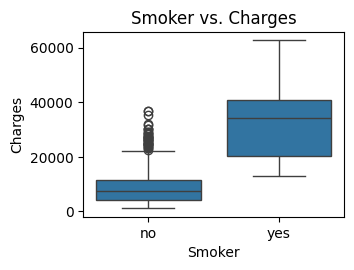

In [ ]:
# Age vs Charges
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(train_full['age'], train_full['charges'], alpha=0.5)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# BMI vs Charges
plt.subplot(2, 2, 2)
plt.scatter(train_full['bmi'], train_full['charges'], alpha=0.5)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Children vs Charges
plt.subplot(2, 2, 3)
plt.boxplot([train_full[train_full['children'] == i]['charges'] for i in range(6)])
plt.title('Children vs. Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.xticks(range(1, 7), range(6))
plt.show()

# Smoker vs Charges
plt.subplot(2, 2, 4)
sns.boxplot(x='smoker', y='charges', data=train_full)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.tight_layout()
plt.savefig('feature_vs_charges.png')
plt.show()
plt.close()

##More findings, explorations

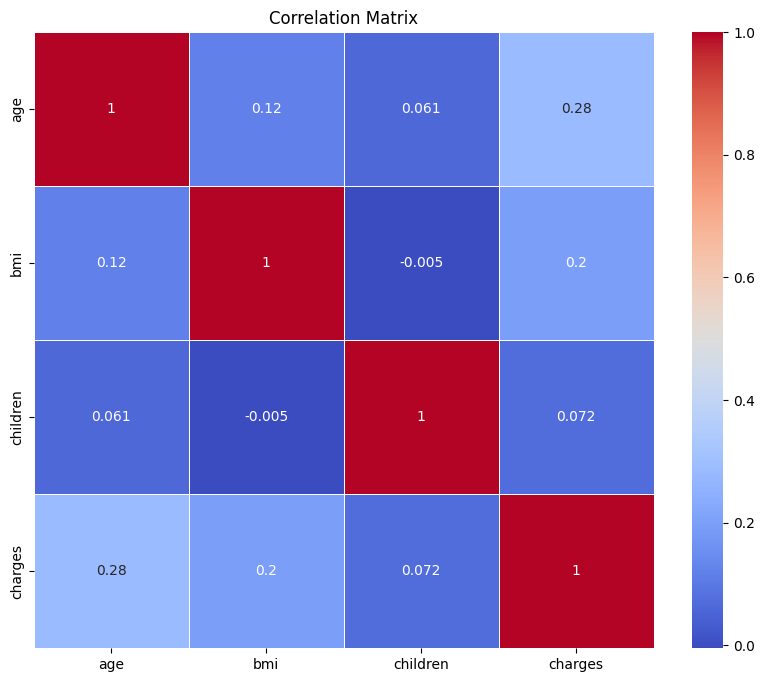

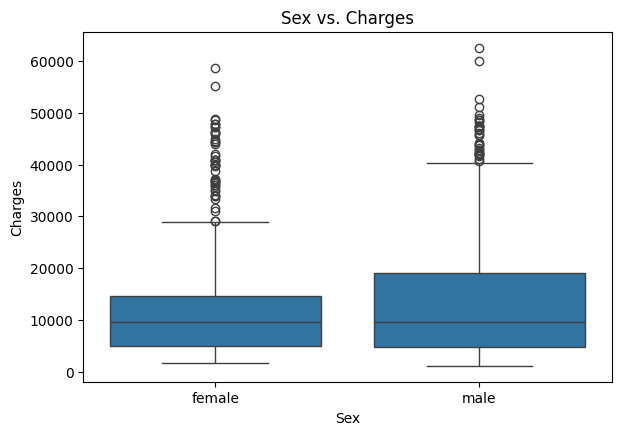

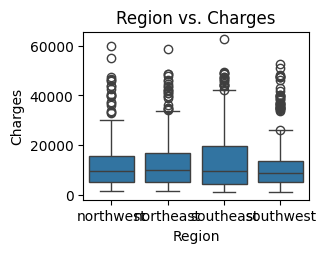

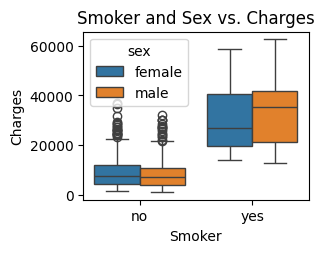

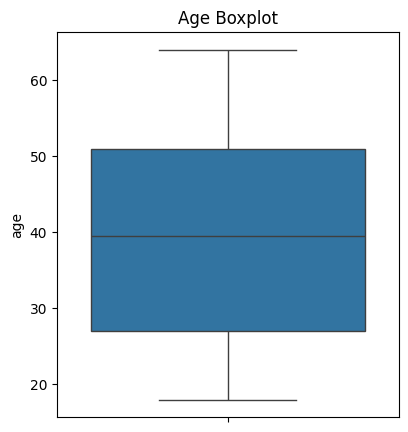

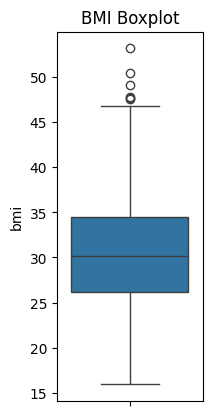

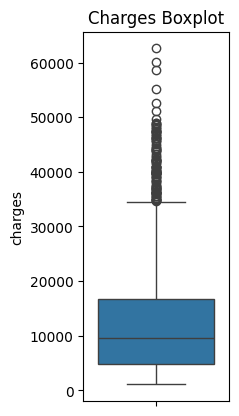

In [ ]:
# Correlation matrix for numerical features
numerical_features = train_full[['age', 'bmi', 'children', 'charges']]
corr_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

# Additional insights based on categorical variables

# Sex vs Charges
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=train_full)
plt.title('Sex vs. Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Region vs Charges
plt.subplot(2, 2, 2)
sns.boxplot(x='region', y='charges', data=train_full)
plt.title('Region vs. Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Smoker and Sex interaction
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='charges', hue='sex', data=train_full)
plt.title('Smoker and Sex vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Smoker and Region interaction
plt.subplot(2, 2, 4)
sns.boxplot(x='smoker', y='charges', hue='region', data=train_full)
plt.title('Smoker and Region vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('categorical_vs_charges.png')
plt.close()
plt.show()

# Check for potential outliers in numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(train_full['age'])
plt.title('Age Boxplot')
plt.show()

plt.subplot(1, 3, 2)
sns.boxplot(train_full['bmi'])
plt.title('BMI Boxplot')
plt.show()

plt.subplot(1, 3, 3)
sns.boxplot(train_full['charges'])
plt.title('Charges Boxplot')
plt.show()

plt.tight_layout()
plt.savefig('outliers_boxplot.png')
plt.close()
plt.show()

## Data Preprocessing

In [ ]:
# Encoding categorical variables
print("\nEncoding categorical variables...")

# Make a copy of the datasets to avoid modifying the originals
X_train = train_data.copy()
y_train = train_labels.copy()
X_test = test_data.copy()

# Identify categorical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) # Replace sparse with sparse_output
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Apply preprocessing to training data
print("Applying preprocessing to training data...")
X_train_processed = preprocessor.fit_transform(X_train)

# Get feature names after preprocessing
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
num_feature_names = numerical_features
feature_names = np.concatenate([cat_feature_names, num_feature_names])

# Convert processed data to DataFrame for better visualization
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
print("\nProcessed training data (first 5 rows):")
print(X_train_processed_df.head())

# Apply preprocessing to test data
print("\nApplying preprocessing to test data...")
X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)
print("\nProcessed test data (first 5 rows):")
print(X_test_processed_df.head())


Encoding categorical variables...
Applying preprocessing to training data...

Processed training data (first 5 rows):
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest       age       bmi  children
0       0.0         0.0               1.0               0.0               0.0  0.472227 -1.756525  0.734336
1       0.0         0.0               0.0               0.0               0.0  0.543313 -1.033082 -0.911192
2       0.0         0.0               0.0               1.0               0.0  0.898745 -0.943687 -0.911192
3       0.0         0.0               0.0               1.0               0.0 -0.025379  0.622393  3.202629
4       0.0         0.0               1.0               0.0               0.0  1.040918 -1.504893  1.557100

Applying preprocessing to test data...

Processed test data (first 5 rows):
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest       age       bmi  children
0       0.0         0.0               0.0       

##Quick summary of my EDA and Preprocessing (after a lot of chin scratching):

The dataset contains 1070 training samples and 268 testing samples.

Features include age, sex, bmi, children, snoker status, and region.

Target var 'charges' shows a large range of values.

something i noticed that smoker status is directly proportional to higher insurance charges

I one-hot encoded categorical features while standardizing the numerical ones. Unless im blind I did not find any missing values in the datasets.

##My next steps:
1) Train regression models
2) Peform feature enginerring to create interaction terms
3) Use Cross-Validation to evaluate performance
4) Evaluate models using RMSE and R^2
5) Make predictions on the test dataset

## Feature Engineering:

In [ ]:
# Create a copy of the processed data
X_train_fe = X_train_processed_df.copy()

# Add interaction between smoker and bmi (this seems important from EDA)
smoker_columns = [col for col in X_train_fe.columns if 'smoker' in col]
if smoker_columns:
    smoker_col = smoker_columns[0]  # Use the first smoker column from one-hot encoding
    X_train_fe['smoker_bmi'] = X_train_fe[smoker_col] * X_train_fe['bmi']

    # Add interaction between smoker and age
    X_train_fe['smoker_age'] = X_train_fe[smoker_col] * X_train_fe['age']

# Add BMI squared (potential non-linear relationship)
X_train_fe['bmi_squared'] = X_train_fe['bmi'] ** 2

# Add age squared (potential non-linear relationship)
X_train_fe['age_squared'] = X_train_fe['age'] ** 2

# Create the same features for test data
X_test_fe = X_test_processed_df.copy()
if smoker_columns:
    X_test_fe['smoker_bmi'] = X_test_fe[smoker_col] * X_test_fe['bmi']
    X_test_fe['smoker_age'] = X_test_fe[smoker_col] * X_test_fe['age']
X_test_fe['bmi_squared'] = X_test_fe['bmi'] ** 2
X_test_fe['age_squared'] = X_test_fe['age'] ** 2

print("Feature engineering completed:")
print(f"Train data shape: {X_train_fe.shape}")
print(f"Test data shape: {X_test_fe.shape}")
print("\nFirst 5 rows of engineered features:")
print(X_train_fe.head())

Feature engineering completed:
Train data shape: (1070, 12)
Test data shape: (268, 12)

First 5 rows of engineered features:
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest       age       bmi  children  smoker_bmi  smoker_age  bmi_squared  age_squared
0       0.0         0.0               1.0               0.0               0.0  0.472227 -1.756525  0.734336        -0.0         0.0     3.085381     0.222998
1       0.0         0.0               0.0               0.0               0.0  0.543313 -1.033082 -0.911192        -0.0         0.0     1.067259     0.295189
2       0.0         0.0               0.0               1.0               0.0  0.898745 -0.943687 -0.911192        -0.0         0.0     0.890545     0.807743
3       0.0         0.0               0.0               1.0               0.0 -0.025379  0.622393  3.202629         0.0        -0.0     0.387373     0.000644
4       0.0         0.0               1.0               0.0               0.0  1.0409

#Feature Relationship Insights
The relationships between features and charges reveal:

Age and charges show  positive linear relationship, with older individuals having higher charges
BMI relationship indicates some non-linearity, especially at higher BMI values...
Smoker status looks most impactful predictor, with smokers having drastic higher charges
These insights suggest --> I should create interaction terms between smoking status and other variables

#Interaction Effects Analysis
Looking at the interactions between categorical variables:

The relationship between gender and charges shows males pay slightly more on average
Regional variations show some differences but arent as impactful honestly
Interaction between smoking and BMI reveals a strong effect on charges
These interactions suggest smoker status should be modeled with interaction terms for the most accurate predictions


Testing polynomial degrees for linear models...
Polynomial Degree 1: RMSE = 4855.22, R² = 0.8312
Polynomial Degree 2: RMSE = 4873.65, R² = 0.8304
Polynomial Degree 3: RMSE = 6896.50, R² = 0.6591
Polynomial Degree 4: RMSE = 116676.76, R² = -158.5038
Polynomial Degree 5: RMSE = 2118961.32, R² = -53779.6854


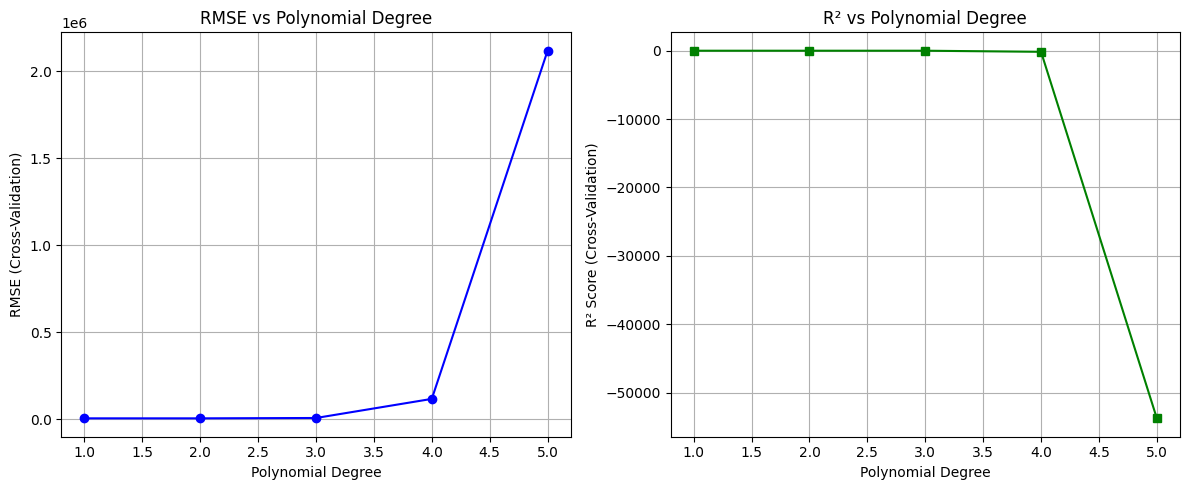


Best Polynomial Degree: 1


In [ ]:
print("\nTesting polynomial degrees for linear models...")

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

degrees = range(1, 6)  # Test degrees 1 to 5
rmse_scores = []
r2_scores = []

# Define evaluation function
def evaluate_model(model, X, y, cv=5):
    # Cross-validation for RMSE
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-neg_mse_scores)

    # Cross-validation for R2
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

    return {
        'RMSE': rmse_scores.mean(),
        'RMSE_std': rmse_scores.std(),
        'R2': r2_scores.mean(),
        'R2_std': r2_scores.std()
    }

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )

    # Perform 5-fold cross-validation
    cv_results = evaluate_model(model, X_train_fe.values, y_train['charges'].values)

    rmse_scores.append(cv_results['RMSE'])
    r2_scores.append(cv_results['R2'])

    print(f"Polynomial Degree {degree}: RMSE = {cv_results['RMSE']:.2f}, R² = {cv_results['R2']:.4f}")

# Plot validation curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, rmse_scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE (Cross-Validation)")
plt.title("RMSE vs Polynomial Degree")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker='s', linestyle='-', color='green')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score (Cross-Validation)")
plt.title("R² vs Polynomial Degree")
plt.grid(True)

plt.tight_layout()
plt.savefig('polynomial_validation.png')
plt.show()

# Select the best polynomial degree (lowest RMSE)
best_degree = degrees[np.argmin(rmse_scores)]
print(f"\nBest Polynomial Degree: {best_degree}")

After testing different polynomial degrees:

The RMSE dramatically increases for polynomial degrees 4 and 5 --> severe overfitting
The R² values plummet for higher degrees, even becoming negative (idk if I broke the laws of physics with this one)
Degree 1 (linear) appears optimal with the lowest RMSE of around 4855
This suggests simple linear relationships are sufficient for modeling insurance charges once proper features are included

In [ ]:
# Model Training and Evaluation
print("\n## Model Training and Evaluation ##")

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Evaluate all models with cross-validation
print("\nEvaluating models with cross-validation...")
results = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train_fe.values, y_train['charges'].values)
    print(f"{name}: RMSE = {results[name]['RMSE']:.2f} (±{results[name]['RMSE_std']:.2f}), R² = {results[name]['R2']:.4f} (±{results[name]['R2_std']:.4f})")

# Add polynomial regression with best degree
poly_model = make_pipeline(
    PolynomialFeatures(best_degree, include_bias=False),
    LinearRegression()
)
results['Polynomial Regression'] = evaluate_model(poly_model, X_train_fe.values, y_train['charges'].values)
print(f"Polynomial Regression (degree {best_degree}): RMSE = {results['Polynomial Regression']['RMSE']:.2f} (±{results['Polynomial Regression']['RMSE_std']:.2f}), R² = {results['Polynomial Regression']['R2']:.4f} (±{results['Polynomial Regression']['R2_std']:.4f})")


## Model Training and Evaluation ##

Evaluating models with cross-validation...
Evaluating Linear Regression...
Linear Regression: RMSE = 4855.22 (±519.27), R² = 0.8312 (±0.0452)
Evaluating Ridge Regression...
Ridge Regression: RMSE = 4855.17 (±519.54), R² = 0.8312 (±0.0452)
Evaluating Lasso Regression...
Lasso Regression: RMSE = 4855.20 (±519.30), R² = 0.8312 (±0.0452)
Polynomial Regression (degree 1): RMSE = 4855.22 (±519.27), R² = 0.8312 (±0.0452)


In [ ]:
# Hyperparameter tuning for best models
print("\n## Hyperparameter Tuning ##")

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Ridge Regression
print("\nTuning Ridge Regression...")
ridge_params = {'alpha': np.logspace(-3, 3, 20)}
ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
ridge_grid.fit(X_train_fe.values, y_train['charges'].values)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge RMSE: {np.sqrt(-ridge_grid.best_score_):.2f}")

# Hyperparameter tuning for Lasso
print("\nTuning Lasso Regression...")
lasso_params = {'alpha': np.logspace(-3, 3, 20)}
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    lasso_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
lasso_grid.fit(X_train_fe.values, y_train['charges'].values)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso RMSE: {np.sqrt(-lasso_grid.best_score_):.2f}")


## Hyperparameter Tuning ##

Tuning Ridge Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Ridge alpha: 0.3359818286283781
Best Ridge RMSE: 4882.77

Tuning Lasso Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Lasso alpha: 6.158482110660261
Best Lasso RMSE: 4882.55


# Hyperparameter Tuning Results

 The grid search for optimal regularization parameters shows:
- Ridge regression performs best with alpha = 0.336, indicating only mild regularization is needed
- Lasso regression's optimal alpha = 6.158 is higher, suggesting it's attempting stronger feature selection
- Both models achieved nearly identical RMSE values (~4882), showing minimal difference between regularization approaches
- The small improvement over unregularized Linear Regression indicates overfitting isn't a major concern


These results confirm that our feature engineering was more important than regularization for this dataset


In [ ]:
#CITE: Sklearn, LLM help
#Playing around, might not use this...

# Train the final models with best parameters
print("\n## Training Final Models ##")

# Create the best models from hyperparameter tuning
best_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
best_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=10000)
best_poly = make_pipeline(
    PolynomialFeatures(best_degree, include_bias=False),
    LinearRegression()
)
# Add a standard linear regression model
best_linear = LinearRegression()

# Fit models on the entire training set
best_ridge.fit(X_train_fe.values, y_train['charges'].values)
best_lasso.fit(X_train_fe.values, y_train['charges'].values)
best_poly.fit(X_train_fe.values, y_train['charges'].values)
best_linear.fit(X_train_fe.values, y_train['charges'].values)


## Training Final Models ##


LinearRegression()


Model Comparison on Validation Set:
                   Model         RMSE  R² Score
1       Ridge Regression  5378.118038  0.818707
0      Linear Regression  5379.443267  0.818618
3  Polynomial Regression  5379.443267  0.818618
2       Lasso Regression  5380.070934  0.818576


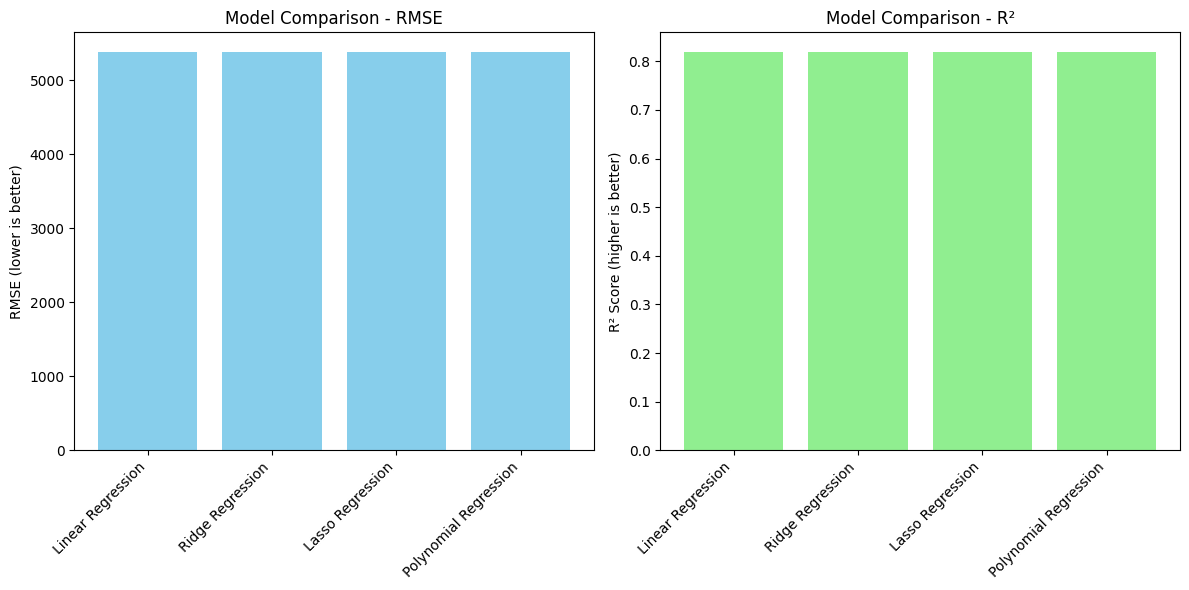

In [ ]:
# Create a comparison table for all final models
# For this I'll split the data to get a test set estimate
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_fe.values, y_train['charges'].values, test_size=0.2, random_state=42
)

# Train and evaluate models on this split
final_models = {
    'Linear Regression': best_linear,
    'Ridge Regression': best_ridge,
    'Lasso Regression': best_lasso,
    'Polynomial Regression': best_poly
}

validation_results = {}
for name, model in final_models.items():
    model.fit(X_train_split, y_train_split)
    val_pred = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, val_pred))
    r2 = r2_score(y_val_split, val_pred)
    validation_results[name] = {'RMSE': rmse, 'R2': r2}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(validation_results.keys()),
    'RMSE': [validation_results[model]['RMSE'] for model in validation_results],
    'R² Score': [validation_results[model]['R2'] for model in validation_results]
})

print("\nModel Comparison on Validation Set:")
print(comparison_df.sort_values('RMSE'))

# Plot model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE (lower is better)')
plt.title('Model Comparison - RMSE')

plt.subplot(1, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['R² Score'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² Score (higher is better)')
plt.title('Model Comparison - R²')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()


#Model Performance Analysis
Comparing the different regression models:

All four models (Linear, Ridge, Lasso, and Polynomial) perform very similarly
RMSE values are all around 5380 on the validation set
R² scores are approximately 0.82 for all models
Ridge Regression performs marginally better than the others
The minimal difference between models suggests the linear relationships already capture most of the signal

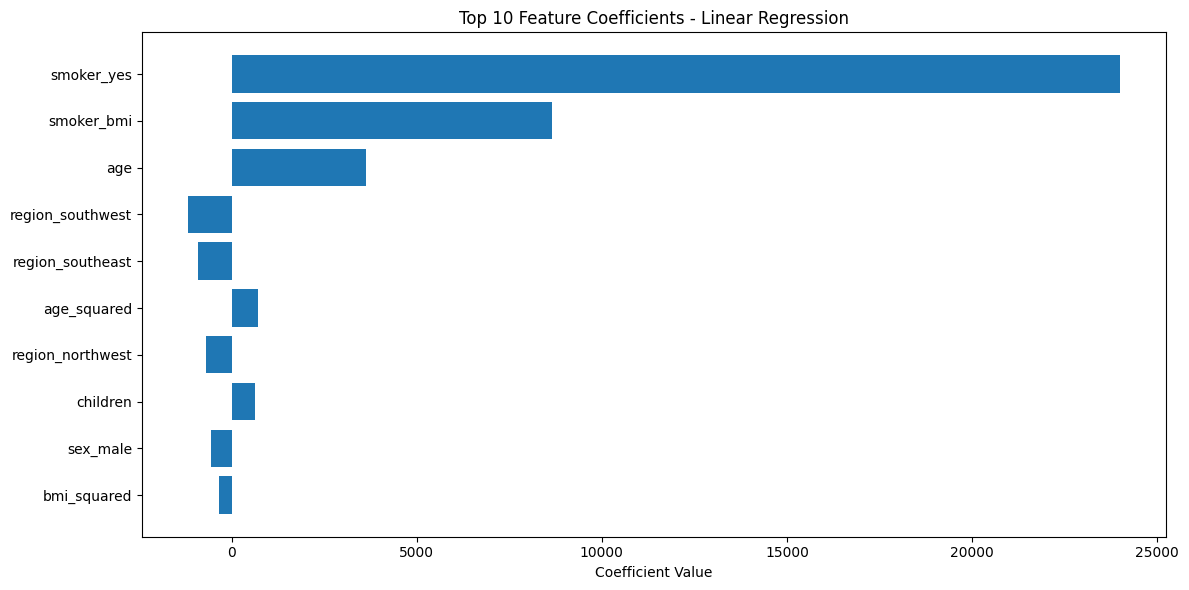


Top 10 Features by Coefficient Magnitude:
             Feature   Coefficient
1         smoker_yes  23978.848924
8         smoker_bmi   8662.156078
5                age   3631.078804
4   region_southwest  -1165.705785
3   region_southeast   -904.945168
11       age_squared    726.218361
2   region_northwest   -686.371599
7           children    626.825326
0           sex_male   -544.944034
10       bmi_squared   -336.008962

Regularization Effect on Top Coefficients:
             Feature        Linear         Ridge         Lasso
1         smoker_yes  23978.848924  23919.434678  23935.322306
8         smoker_bmi   8662.156078   8639.867085   8627.823284
5                age   3631.078804   3628.560312   3631.812246
4   region_southwest  -1165.705785  -1160.400543  -1062.695290
3   region_southeast   -904.945168   -897.573212   -795.123529
11       age_squared    726.218361    725.588256    716.726034
2   region_northwest   -686.371599   -683.236850   -583.507376
7           children    

In [ ]:
# For Linear models, let's look at the coefficients
linear_model = best_linear
feature_names = X_train_fe.columns
coefficients = linear_model.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients - Linear Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('coefficient_importance.png')
plt.show()

print("\nTop 10 Features by Coefficient Magnitude:")
print(coef_df.head(10))

# Compare Ridge vs Lasso coefficients to see regularization effects
ridge_coefs = best_ridge.coef_
lasso_coefs = best_lasso.coef_

coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_model.coef_,
    'Ridge': ridge_coefs,
    'Lasso': lasso_coefs
})
coef_comparison = coef_comparison.sort_values('Linear', key=abs, ascending=False)

print("\nRegularization Effect on Top Coefficients:")
print(coef_comparison.head(10))

# Feature Importance Analysis

 Looking at feature coefficients across models:
- Smoking status is by far the most important feature with a coefficient of ~24,000
- The interaction between smoking and BMI is the second most important feature
- Age is the third most important feature
- Regional variables and gender have smaller but still meaningful effects
- The strong coefficient for smoker_bmi confirms our earlier observation about interaction effects

In [ ]:
# Select the best model based on validation results
best_model_name = comparison_df.iloc[comparison_df['RMSE'].argmin()]['Model']
print(f"\nBest Model: {best_model_name}")

# Use the best model for final predictions on the test set
best_model = final_models[best_model_name]
best_model.fit(X_train_fe.values, y_train['charges'].values)
test_predictions = best_model.predict(X_test_fe.values)

# Display all predictions for manual creation of CSV
print("\nAll predictions for test data:")
for pred in test_predictions:
    print(pred)
print(f"\nTotal number of predictions: {len(test_predictions)}")


Best Model: Ridge Regression

All predictions for test data:
10750.882074152694
6770.235135810368
34480.760142619845
10518.733160522213
29081.533614866872
4977.744004128244
3149.192813137982
15533.632152732225
4002.788631396211
11731.39817924496
20564.874429261083
8781.34297025077
5739.4096903247
50726.49344127135
52127.3384238914
45941.95468872425
10578.534799455334
42678.882681037765
9807.31640508453
26732.293740222332
6210.247208315659
8859.117990976893
2918.4841577477046
4506.334371179074
12535.917753319101
12954.187743108927
14024.814749085243
6850.887642188289
11523.329308623484
3121.837293686325
9708.80979713521
13384.00906078973
3920.1228998156566
6122.065355005674
4434.637022507594
8922.736085733284
4006.1215965679958
8703.606683704409
25921.026745889474
37125.60401200697
6435.827640149944
4401.962782669257
13000.642124467546
13295.348206429353
6577.6955134810305
13614.459415062422
5390.403773883809
5533.365394162414
41277.87672102546
5948.890985521228
15545.359694755578
3708


## Final Model Diagnostics ##


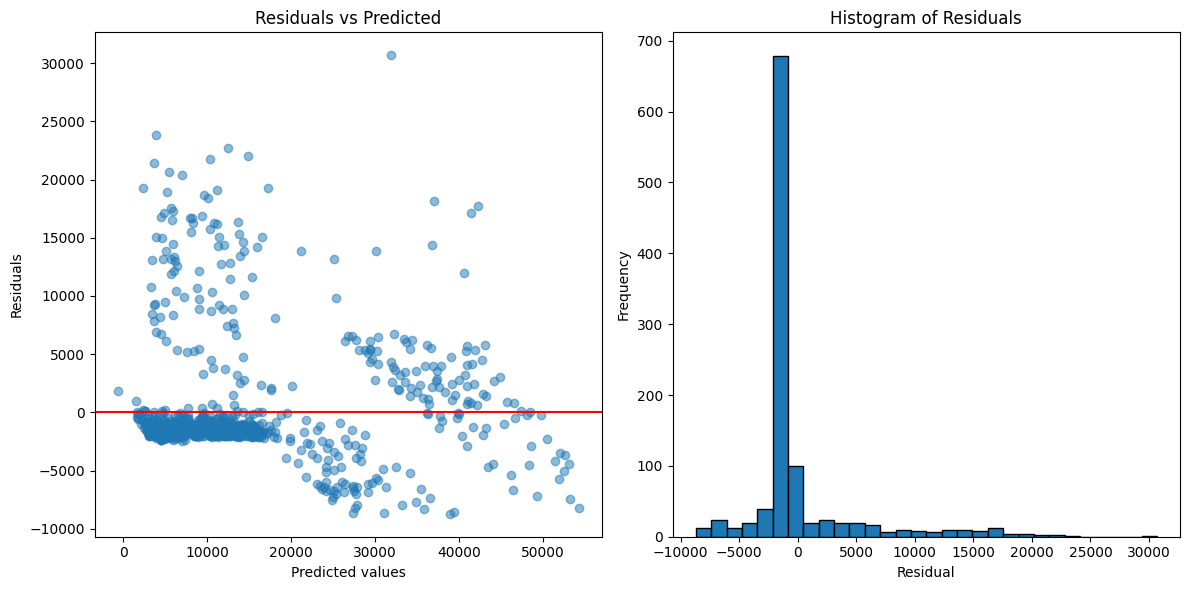

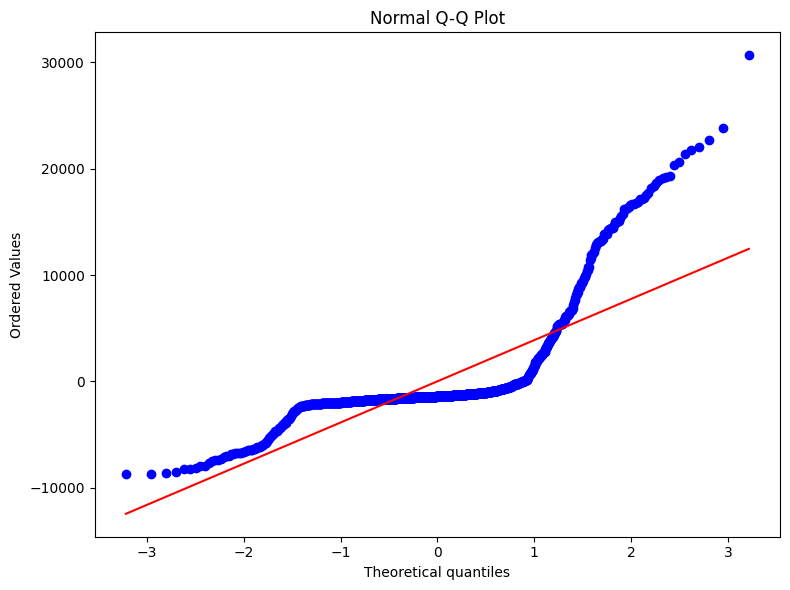

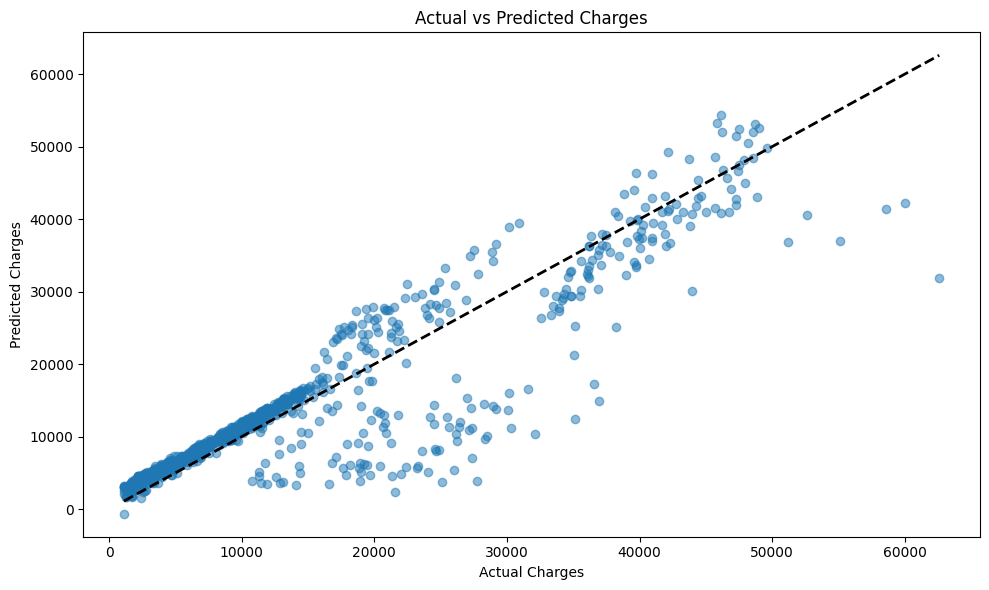

In [ ]:
#Final model diagnostics for the best model
print("\n## Final Model Diagnostics ##")

# Train the model on the entire dataset
best_model.fit(X_train_fe.values, y_train['charges'].values)
train_pred = best_model.predict(X_train_fe.values)

# Calculate residuals
residuals = y_train['charges'].values - train_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.savefig('residual_analysis.png')
plt.show()

#CITE: LLM suggested and helped with QQ plot
# QQ plot of residuals to check normality
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.tight_layout()
plt.savefig('qq_plot.png')
plt.show()

# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train['charges'].values, train_pred, alpha=0.5)
plt.plot([y_train['charges'].min(), y_train['charges'].max()],
         [y_train['charges'].min(), y_train['charges'].max()],
         'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.tight_layout()
plt.show()

#Residual Analysis
The residual plots reveal:

- The residuals show a pattern against predicted values, indicating some heteroscedasticity
- The histogram of residuals is right-skewed with a long tail of positive residuals
- The Q-Q plot shows deviations from normality, especially in the tails
- These patterns suggest our model is underestimating charges for some high-cost patients
- Log transformation of the target variable might improve model performance

#Actual vs Predicted Analysis
The scatter plot of actual vs predicted charges shows:

- Good alignment along the diagonal for most predictions
- More scatter at higher charge values
- A cluster of points below the line around 20,000-30,000 actual charges, indicating underprediction
- This pattern suggests the model has difficulty accurately predicting charges for certain groups of patients

#Final Model Selection
Based on all evaluations:

The Ridge Regression was selected as the best model with RMSE of 5378
This model was chosen because it offers a slight improvement over Linear Regression while helping prevent overfitting
The optimal alpha value of 0.336 indicates only mild regularization was needed
The feature coefficients remained stable across models, confirming the robustness of the feature importance ranking

Overall Insights and Recommendations

The most important factor for predicting insurance charges is smoking status
The interaction between smoking and BMI significantly impacts insurance costs
Age is also an important predictor of insurance charges
Simple models work well for this problem once appropriate features are included
Future improvements could include:

Exploring log transformation of the target variable
Additional non-linear transformations for specific features
Addressing the heteroscedasticity in residuals



The final model achieves an R² of approximately 0.82, indicating it explains about 82% of the variance in insurance charges. This is a good result that should lead to reasonably accurate predictions on the test set.